# Import Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [19]:
rdata = pd.read_csv('/content/drive/MyDrive/Atlanta/Week 6 Training/Week 6 Project/Data/Reddit/reddit_scraper.csv',
                    header = None)

In [20]:
rdata.head()

,0,1,2,3,4
0,03/09/2021,Anyone know what these shoes are called?,NaN,Link,Comments
1,03/09/2021,What I got on the Nike app trying to get the U...,NaN,Link,Comments
2,03/09/2021,"These look so cool, it’s just up my alley of a...",NaN,Link,Comments
3,03/09/2021,Nike,NaN,Link,Comments
4,03/09/2021,Unathletic Department,NaN,Link,Comments


In [21]:
rdata.shape

(17500, 5)

# Table Format Pre-Processing

In [22]:
rdata.drop([2,3,4], axis=1, inplace=True)
rdata.head()

,0,1
0,03/09/2021,Anyone know what these shoes are called?
1,03/09/2021,What I got on the Nike app trying to get the U...
2,03/09/2021,"These look so cool, it’s just up my alley of a..."
3,03/09/2021,Nike
4,03/09/2021,Unathletic Department


In [23]:
rdata.columns = ['Date', 'Post']
rdata.head()

,Date,Post
0,03/09/2021,Anyone know what these shoes are called?
1,03/09/2021,What I got on the Nike app trying to get the U...
2,03/09/2021,"These look so cool, it’s just up my alley of a..."
3,03/09/2021,Nike
4,03/09/2021,Unathletic Department


In [24]:
rdata['Date'] = [date[3:5] + '/' + date[0:2] + '/' + date[6:10] for date in rdata['Date']]
rdata.head()

,Date,Post
0,09/03/2021,Anyone know what these shoes are called?
1,09/03/2021,What I got on the Nike app trying to get the U...
2,09/03/2021,"These look so cool, it’s just up my alley of a..."
3,09/03/2021,Nike
4,09/03/2021,Unathletic Department


Now, let's add a Post ID for future reference.

In [25]:
rdata.reset_index(level = 0, inplace=True)
rdata.columns = ['Post_id', 'Date', 'Post']
rdata.head()

,Post_id,Date,Post
0,0,09/03/2021,Anyone know what these shoes are called?
1,1,09/03/2021,What I got on the Nike app trying to get the U...
2,2,09/03/2021,"These look so cool, it’s just up my alley of a..."
3,3,09/03/2021,Nike
4,4,09/03/2021,Unathletic Department


# EDA

In [26]:
max([len(post) for post in rdata['Post']])

312

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


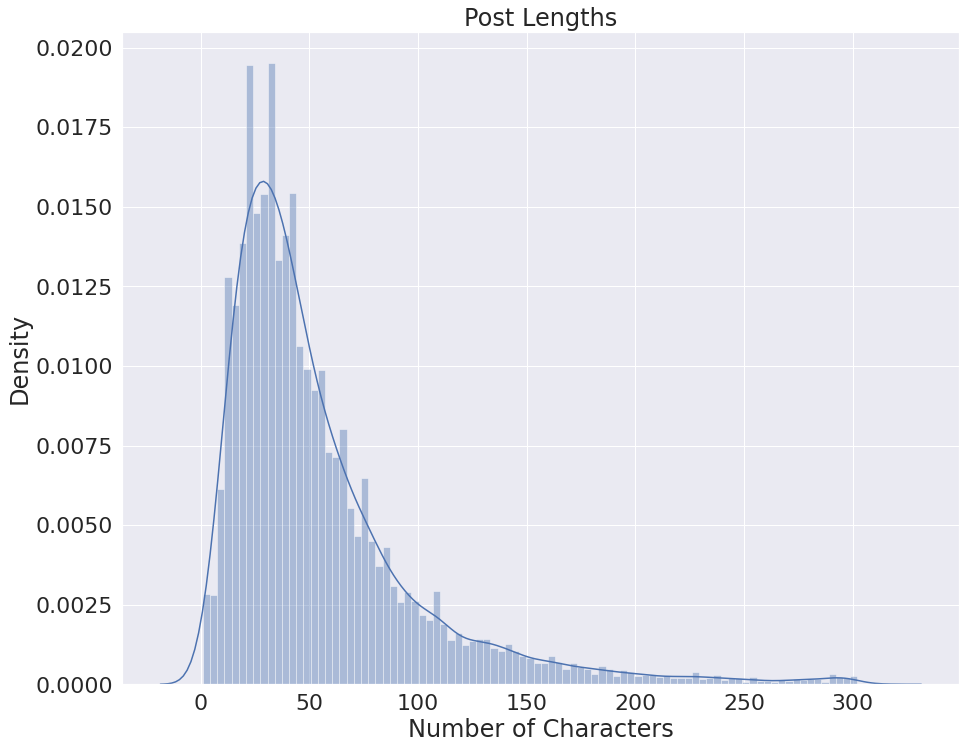

In [27]:
plt.figure(figsize=(15,12))
sns.set(font_scale=2)
sns.distplot([len(post) for post in rdata['Post']], bins='auto')
plt.title("Post Lengths")
plt.xlabel('Number of Characters')
plt.show();

# Text Pre-Processing

### De-contract Words

In [28]:
!pip install contractions
import contractions

     |████████████████████████████████| 284 kB 4.8 MB/s 
     |████████████████████████████████| 321 kB 66.0 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85443 sha256=b687cec01e9134842ea116503a1d161a5a809ea25d15ad4e97cebe47dba83047
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [29]:
def replace_contractions(text):
  return contractions.fix(text)

In [30]:
rdata1 = rdata.copy()

In [31]:
for i, post in enumerate(rdata['Post']):
  rdata1['Post'][i] = replace_contractions(post)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
rdata1.head()

,Post_id,Date,Post
0,0,09/03/2021,Anyone know what these shoes are called?
1,1,09/03/2021,What I got on the Nike app trying to get the U...
2,2,09/03/2021,"These look so cool, it is just up my alley of ..."
3,3,09/03/2021,Nike
4,4,09/03/2021,Unathletic Department


### Remove Numericals

In [33]:
import re

def remove_numbers(post):
  post = re.sub(r'\d+', '', post)
  return post

In [34]:
rdata1['Post'] = rdata1['Post'].apply(lambda x: remove_numbers(x))

### Tokenization

In [35]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer = ToktokTokenizer()

for i, post in enumerate(rdata['Post']):
  rdata1['Post'][i] = tokenizer.tokenize(post)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [36]:
rdata1.head()

,Post_id,Date,Post
0,0,09/03/2021,"[Anyone, know, what, these, shoes, are, called..."
1,1,09/03/2021,"[What, I, got, on, the, Nike, app, trying, to,..."
2,2,09/03/2021,"[These, look, so, cool, ,, it, ’, s, just, up,..."
3,3,09/03/2021,[Nike]
4,4,09/03/2021,"[Unathletic, Department]"


### Non-Ascii Characters

In [37]:
import unicodedata

def remove_non_ascii(words):
  new_words = []
  for word in words:
    new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    new_words.append(new_word)
  return new_words

In [38]:
rdata1['Post'] = rdata1['Post'].apply(lambda post: remove_non_ascii(post))

In [39]:
rdata1['Post'][0]

['Anyone', 'know', 'what', 'these', 'shoes', 'are', 'called', '?']

### Punctuation

In [40]:
def remove_punctuation(words):
  new_words = []
  for word in words:
    new_word = re.sub(r'[^\w\s]', '', word)
    if new_word != '':
      new_words.append(new_word)
  return new_words

In [41]:
rdata1['Post'] = rdata1['Post'].apply(lambda post: remove_punctuation(post))

In [42]:
rdata1['Post'][0]

['Anyone', 'know', 'what', 'these', 'shoes', 'are', 'called']

### Lower Case

In [43]:
def lower_case(words):
  new_words = []
  for word in words:
    new_word = word.lower()
    new_words.append(new_word)
  return new_words

In [44]:
rdata1['Post'] = rdata1['Post'].apply(lambda post: lower_case(post))

In [45]:
rdata1.head()

,Post_id,Date,Post
0,0,09/03/2021,"[anyone, know, what, these, shoes, are, called]"
1,1,09/03/2021,"[what, i, got, on, the, nike, app, trying, to,..."
2,2,09/03/2021,"[these, look, so, cool, it, s, just, up, my, a..."
3,3,09/03/2021,[nike]
4,4,09/03/2021,"[unathletic, department]"


### Stop Words

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [48]:
# We don't want to remove 'no' or 'not', so we take it out of the stopwords list
stopwords.remove('no')
stopwords.remove('not')

In [49]:
def remove_stopwords(words):
  new_words = []
  for word in words:
    if word not in stopwords:
      new_words.append(word)
  return new_words

In [50]:
rdata1['Post'] = rdata1['Post'].apply(lambda post: remove_stopwords(post))

In [51]:
rdata1['Post']

0                            [anyone, know, shoes, called]
1        [got, nike, app, trying, get, unc, dunks, toda...
2        [look, cool, alley, aesthetics, someone, pleas...
3                                                   [nike]
4                                 [unathletic, department]
                               ...                        
17495             [anyone, tell, buy, come, roughly, much]
17496                                  [name, shoes, need]
17497                 [pg, 25, playstation, dropping, 121]
17498    [footlocker, australia, running, custom, tns, ...
17499                                   [custom, kobe, ad]
Name: Post, Length: 17500, dtype: object

### Special Characters

In [52]:
def remove_special_characters(words):
  pattern = r'[^a-zA-z\s]'
  new_words = []
  for word in words:
    new_word = re.sub(pattern, '', word)
    new_words.append(new_word)
  return new_words

In [53]:
rdata1['Post'] = rdata1['Post'].apply(lambda post: remove_special_characters(post))

In [54]:
rdata1['Post'][3283]

['name', 'nike', 'shoes', 'circa', 'sometime', 'around', '']

### Remove Blank Words

In [55]:
def remove_blanks(words):
  new_words = []
  for word in words:
    if word != '':
      new_words.append(word)
  return new_words

In [56]:
rdata1['Post'] = rdata1['Post'].apply(lambda post: remove_blanks(post))

In [57]:
rdata1['Post'][3283]

['name', 'nike', 'shoes', 'circa', 'sometime', 'around']

In [58]:
rdata['Post'][28]

'Anyone know where you can get the white flag hats that the Nike SB team was wearing at the olympics? Can’t find them anywhere.'

In [59]:
rdata1['Post'][28]

['anyone',
 'know',
 'get',
 'white',
 'flag',
 'hats',
 'nike',
 'sb',
 'team',
 'wearing',
 'olympics',
 'find',
 'anywhere']

### Lemmatize

In [60]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
  
lemmatizer = WordNetLemmatizer()
  
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
rocks : rock
corpora : corpus


In [61]:
def lemmatize_words(words):
  new_words = []
  for word in words:
    new_word = lemmatizer.lemmatize(word)
    new_words.append(new_word)
  return new_words

In [62]:
rdata1['Post'] = rdata1['Post'].apply(lambda post: lemmatize_words(post))

In [63]:
rdata['Post'][45]

'Finally pulled them out of the box. Is that toe crease/wrinkle normal? I haven’t put them on yet, I’m waiting on my sneaker shields to arrive.'

In [64]:
rdata1['Post'][45]

['finally',
 'pulled',
 'box',
 'toe',
 'creasewrinkle',
 'normal',
 'put',
 'yet',
 'waiting',
 'sneaker',
 'shield',
 'arrive']

# Exploration of Pre-Processed Corpus

In [65]:
from collections import Counter

top = Counter([item for sublist in rdata1['Post'] for item in sublist])
freq = pd.DataFrame(top.most_common(20))
freq.columns = ['Common_words','Count']
freq.style.background_gradient(cmap='Reds')

,Common_words,Count
0,nike,5285
1,shoe,2651
2,anyone,2272
3,air,2111
4,know,1846
5,help,1524
6,jordan,1129
7,find,1055
8,id,878
9,max,858


# Sentiment Analysis

### Simple Sentiment Evaluation

In [66]:
from textblob import TextBlob
text = TextBlob("In 1939 the war started")
print(text.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)


In [67]:
text = TextBlob("I am very happy")
print(text.sentiment)

Sentiment(polarity=1.0, subjectivity=1.0)


### Download a Lexicon

We are performing Unsupervised sentiment analysis because we don't have predetermined labels. We'll have to use a rule-based approach to derive our own sentiments from each post. Bing Liu has an opinion lexicon published that is specializes on social media.

In [68]:
pos_lexicon = pd.read_csv('/content/drive/MyDrive/Atlanta/Week 6 Training/Week 6 Project/Data/Reddit/Opinion Lexicon/opinion-lexicon-English_positive-words.txt',
                          header = 28)

In [69]:
pos_lexicon.columns = ['word']

In [70]:
pos_lexicon.head()

,word
0,a+
1,abound
2,abounds
3,abundance
4,abundant


In [71]:
neg_lexicon = pd.read_csv('/content/drive/MyDrive/Atlanta/Week 6 Training/Week 6 Project/Data/Reddit/Opinion Lexicon/opinion-lexicon-English_negative-words.txt',
                          engine = 'python',
                          header = 29)

In [72]:
neg_lexicon.columns = ['word']

In [73]:
neg_lexicon.head()

,word
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


In [74]:
print('Positive Words: {}'.format(pos_lexicon.shape[0]))
print('Negative Words: {}'.format(neg_lexicon.shape[0]))

Positive Words: 2006
Negative Words: 4783


### Vader Sentiment

Vader is specifically designed for social media text, so let's use it.

In [75]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
text = SentimentIntensityAnalyzer()
score = text.polarity_scores("I am happy")
print(score)

     |████████████████████████████████| 125 kB 2.6 MB/s 
{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}


In [76]:
score = text.polarity_scores("I just got a call from my boss - does he realise it's Saturday? smh :(")
print(score)

{'neg': 0.271, 'neu': 0.729, 'pos': 0.0, 'compound': -0.6369}


In [77]:
vader_neg = []
vader_neu = []
vader_pos = []
vader_com = []

for post in rdata['Post']:
  scores = text.polarity_scores(post)
  vader_neg.append(scores['neg'])
  vader_neu.append(scores['neu'])
  vader_pos.append(scores['pos'])
  vader_com.append(scores['compound'])

In [78]:
rdata2 = rdata1.copy()

rdata2['Negative'] = vader_neg
rdata2['Neutral'] = vader_neu
rdata2['Positive'] = vader_pos
rdata2['Compound'] = vader_com

rdata2.head()

,Post_id,Date,Post,Negative,Neutral,Positive,Compound
0,0,09/03/2021,"[anyone, know, shoe, called]",0.000,1.000,0.000,0.0000
1,1,09/03/2021,"[got, nike, app, trying, get, unc, dunk, today...",0.000,0.704,0.296,0.8217
2,2,09/03/2021,"[look, cool, alley, aesthetic, someone, please...",0.191,0.646,0.163,-0.2265
3,3,09/03/2021,[nike],0.000,1.000,0.000,0.0000
4,4,09/03/2021,"[unathletic, department]",0.000,1.000,0.000,0.0000


### Assigning Sentiment To Each Post

In [79]:
rdata3 = rdata2[['Date', 'Post', 'Compound']]
rdata3.columns = ['Date', 'Post', 'Sentiment']
rdata3.head()

,Date,Post,Sentiment
0,09/03/2021,"[anyone, know, shoe, called]",0.0000
1,09/03/2021,"[got, nike, app, trying, get, unc, dunk, today...",0.8217
2,09/03/2021,"[look, cool, alley, aesthetic, someone, please...",-0.2265
3,09/03/2021,[nike],0.0000
4,09/03/2021,"[unathletic, department]",0.0000


In [247]:
sum_sent = []
for score in rdata3['Sentiment']:
  if score < -0.2:
    sum_sent.append('Negative')
  elif score < 0.2:
    sum_sent.append('Positive')
  else:
    sum_sent.append('Neutral')

In [248]:
rdata3['Sum_Sent'] = sum_sent

rdata3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Post,Sentiment,Sum_Sent
0,09/03/2021,"[anyone, know, shoe, called]",0.0000,Positive
1,09/03/2021,"[got, nike, app, trying, get, unc, dunk, today...",0.8217,Neutral
2,09/03/2021,"[look, cool, alley, aesthetic, someone, please...",-0.2265,Negative
3,09/03/2021,[nike],0.0000,Positive
4,09/03/2021,"[unathletic, department]",0.0000,Positive
...,...,...,...,...
17495,11/22/2018,"[anyone, tell, buy, come, roughly, much]",0.0000,Positive
17496,11/22/2018,"[name, shoe, need]",0.0000,Positive
17497,11/22/2018,"[pg, playstation, dropping]",0.0000,Positive
17498,11/22/2018,"[footlocker, australia, running, custom, tn, c...",0.7269,Neutral


### Sentiment Data Exploration

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


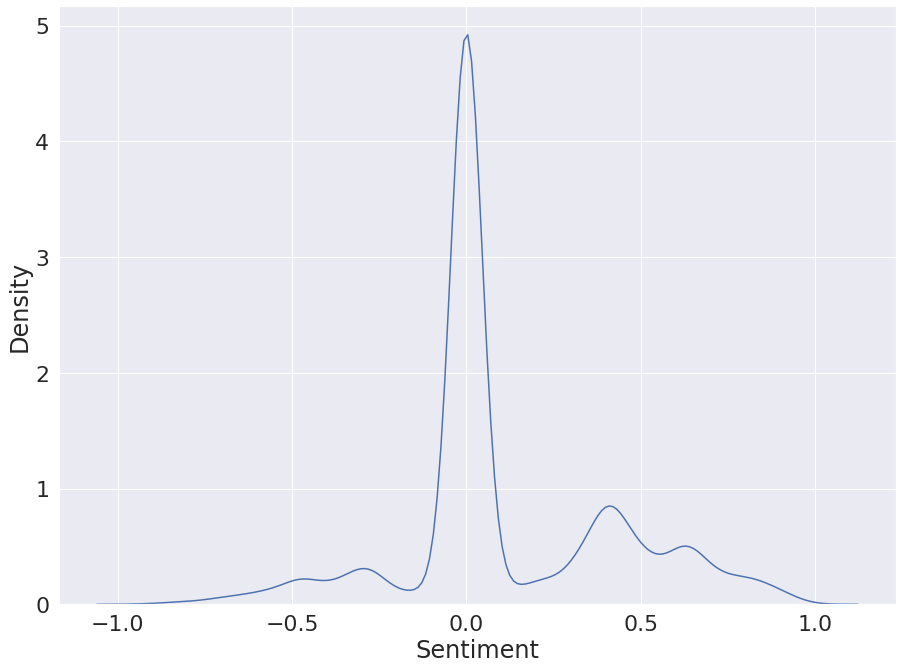

In [249]:
plt.figure(figsize=(15,11))
sns.distplot(rdata3['Sentiment'], bins='auto', hist=False)
plt.xlabel('Sentiment')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


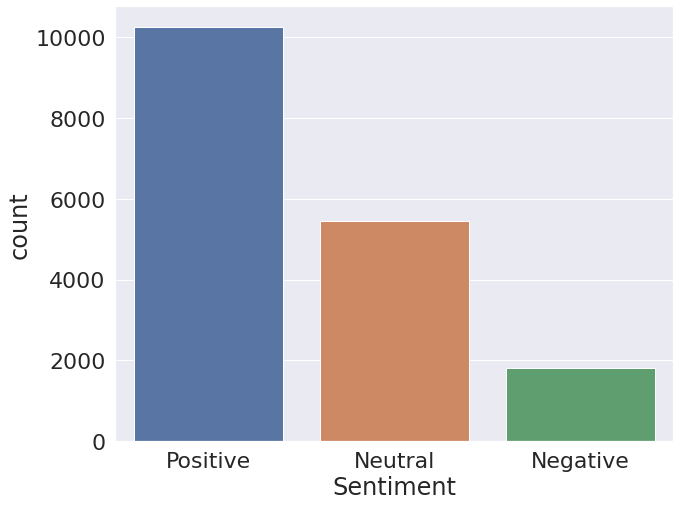

In [250]:
plt.figure(figsize=(10,8))
sns.countplot(rdata3['Sum_Sent'])
plt.xlabel('Sentiment')
plt.show();

### Word Clouds

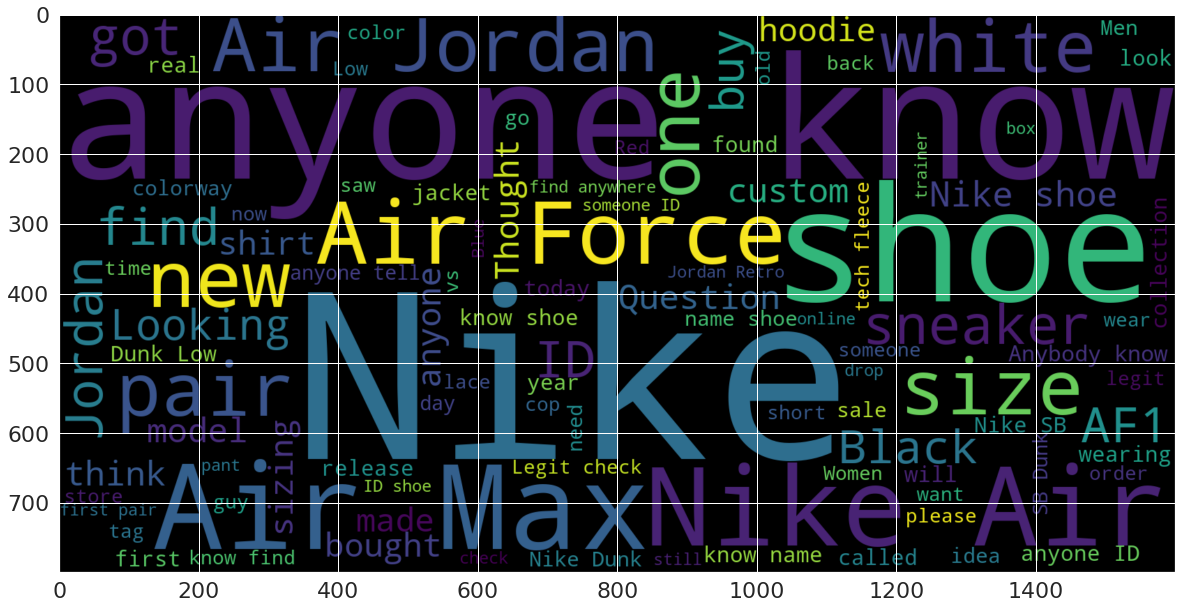

In [84]:
from wordcloud import WordCloud

# Top 100 words for positive posts:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(rdata[rdata3.Sum_Sent == 'Positive'].Post))
plt.imshow(wc , interpolation = 'bilinear')

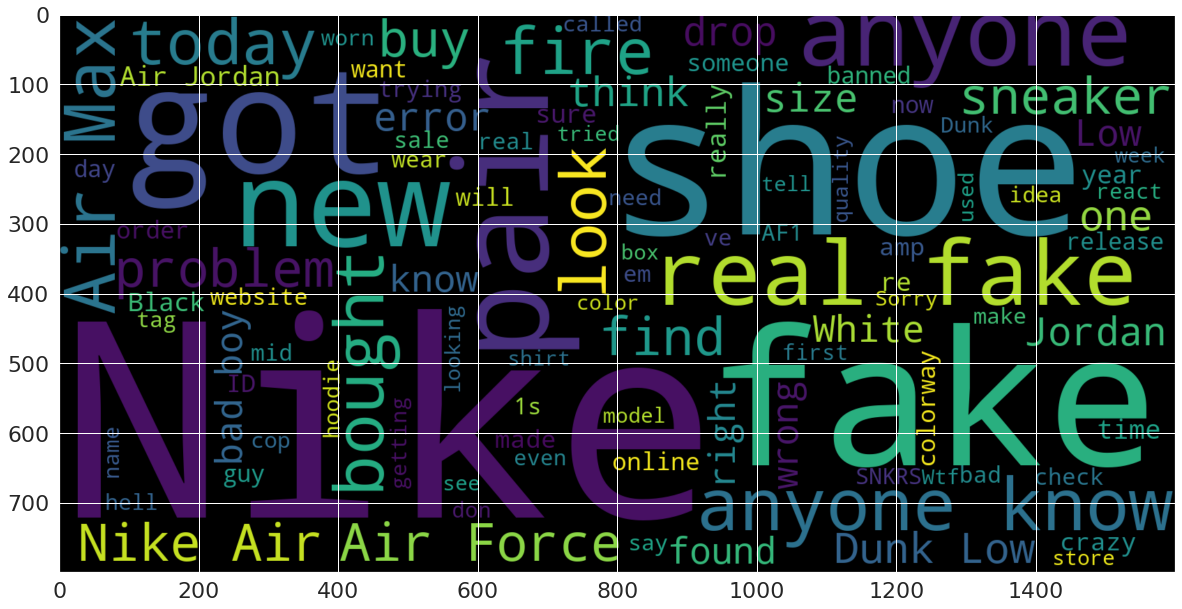

In [85]:
# Top 100 words for negative posts:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(rdata[rdata3.Sum_Sent == 'Negative'].Post))
plt.imshow(wc , interpolation = 'bilinear')

### Tracking Over Time

We'll track by month for the first 8 months of 2021.

In [251]:
positives = []
neutrals = []
negatives = []

for month in np.arange(1,9):
  month_df = rdata3[[True if ((date[1:2] == str(month)) & (date[6:10] == '2021')) else False for date in rdata3['Date']]]
  counts = month_df['Sum_Sent'].value_counts(normalize=True)

  positives.append(counts['Positive'])
  neutrals.append(counts['Neutral'])
  negatives.append(counts['Negative'])

In [252]:
months = pd.DataFrame({'Positives': positives,
                       'Neutrals': neutrals,
                       'Negatives': negatives}).set_index(pd.Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']))
months

,Positives,Neutrals,Negatives
Jan,0.568655,0.312067,0.119279
Feb,0.544323,0.325039,0.130638
Mar,0.580042,0.320166,0.099792
Apr,0.588523,0.307692,0.103785
May,0.582027,0.297806,0.120167
Jun,0.583784,0.322162,0.094054
Jul,0.571272,0.323465,0.105263
Aug,0.553991,0.322066,0.123944


<Figure size 1440x1080 with 0 Axes>

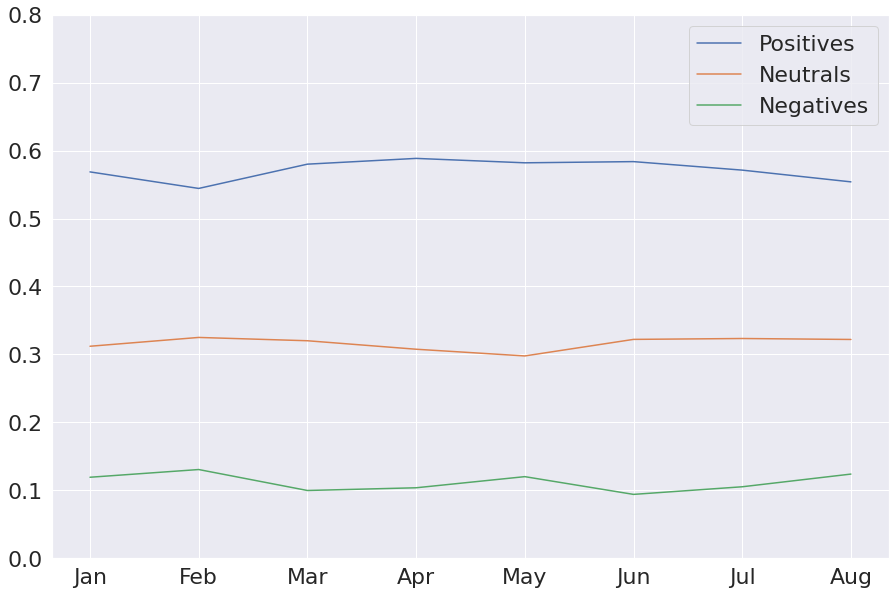

In [266]:
plt.figure(figsize=(20,15))
months.plot.line(figsize = (15,10))
plt.ylim(0, 0.8)
plt.show();

# Intention To Buy

### Trim Dataset

We have more posts (17,500) in the dataset than necessary. Let's narrow the scope.

In [86]:
rdata4 = rdata1.copy()

In [87]:
posts_2021 = [True if row[-4:] == '2021' else False for row in rdata['Date']]
posts_2020 = [True if row[-4:] == '2020' else False for row in rdata['Date']]
posts_2019 = [True if row[-4:] == '2019' else False for row in rdata['Date']]
posts_2018 = [True if row[-4:] == '2018' else False for row in rdata['Date']]

In [88]:
print('2021 posts:', sum(posts_2021))
print('2020 posts:', sum(posts_2020))
print('2019 posts:', sum(posts_2019))
print('2018 posts:', sum(posts_2018))

2021 posts: 6609
2020 posts: 6650
2019 posts: 3971
2018 posts: 270


With an abundance of posts, we can afford to strictly look at the most recent year's worth of posts.

In [89]:
# Drop all posts from before 2021
# Using the original dataset to give ourselves the readable original view of the post rather than the tokenized version
# When we model, we'll pass the labels on to the appropriate rows in the tokenized data
rdata_2021 = rdata[posts_2021]

rdata_2021

,Post_id,Date,Post
0,0,09/03/2021,Anyone know what these shoes are called?
1,1,09/03/2021,What I got on the Nike app trying to get the U...
2,2,09/03/2021,"These look so cool, it’s just up my alley of a..."
3,3,09/03/2021,Nike
4,4,09/03/2021,Unathletic Department
...,...,...,...
6604,6604,01/01/2021,My 11 Years of Nike - Mars Yard Video Submission
6605,6605,01/01/2021,ANY IDEA HOW TO PITCH AN IDEA TO NIKE
6606,6606,01/01/2021,What shoes are these?
6607,6607,01/01/2021,MUST HAVE AIR 270 = COMFORT AND SWAG


### Hand Labelling

We've trimmed our dataset down to 6,609 posts from 2021, but we're realistically only able to hand-label approximately 200 reddit posts.

We'll manually label a sample of our posts, and grade them on a scale of 1 to 4:

1.   Definitely not going to make a purchase
  *   An upset customer (might need attention)
2.   Neutral
  *   Simply commenting
3.   Possibly going to purchase
  *   Product inquiry
4.   Likely to purchase
  *   Wants to know how/where to purchase product


Now, let's split our 2021 data into a subset of hand-labeled manual labels and a subset to test our model on. Within our hand-labeled subset, we'll split that into training, testing, and validation sets. We can set the rest aside as data that we can use to put our model into "production"

In [90]:
# hand_labels = rdata_2021.sample(200)
# hand_labels = hand_labels.sort_values('Post_id')
# hand_labels

In [91]:
# for index, post in enumerate(list(hand_labels['Post'])):
#   print('#{}: {}'.format(index, post))
#   print()

In [92]:
labels = [2, 2, 2, 4, 2, 3, 2, 3, 3, 1, 4, 3, 3, 3, 3, 2, 2, 2, 3, 1,
          4, 4, 4, 2, 2, 3, 4, 2, 3, 3, 4, 2, 3, 2, 1, 3, 3, 1, 1, 3,
          1, 2, 3, 3, 2, 1, 4, 3, 2, 2, 2, 2, 3, 4, 1, 3, 3, 3, 2, 3,
          3, 4, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 4, 2, 2, 4, 4, 2, 2, 3,
          1, 3, 2, 2, 4, 2, 3, 2, 4, 2, 2, 3, 4, 1, 2, 2, 2, 2, 3, 3,
          4, 4, 2, 2, 3, 1, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2,
          1, 1, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 1, 3, 2, 2, 3, 2, 2,
          2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 4, 2, 1,
          2, 2, 2, 3, 2, 2, 1, 4, 3, 2, 3, 4, 2, 2, 4, 4, 2, 2, 2, 2,
          4, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 4, 3, 2, 2, 2, 2, 2, 3,
          ]

In [93]:
# Confirming that we have 200 manual labels
len(labels)

200

In [94]:
# Saving the Post IDs of the posts we hand-labeled for future potential disconnected runtime purposes.
hand_labeled_ids = [52, 99, 112, 117, 156, 190, 220, 267, 309, 315, 376, 399, 402, 465, 476, 487, 514, 516, 518,
                    527, 572, 594, 663, 716, 737, 852, 858, 889, 930, 946, 976, 1012, 1030, 1059, 1100, 1190, 1243, 
                    1252, 1290, 1298, 1307, 1309, 1364, 1369, 1432, 1505, 1566, 1593, 1639, 1674, 1679, 1713, 1762, 
                    1769, 1798, 1876, 1881, 2028, 2089, 2090, 2093, 2101, 2153, 2186, 2238, 2279, 2327, 2384, 2385, 
                    2387, 2405, 2408, 2432, 2447, 2505, 2526, 2538, 2553, 2574, 2593, 2608, 2653, 2690, 2707, 2718, 
                    2760, 2772, 2797, 2805, 2850, 2862, 2863, 2958, 3041, 3069, 3138, 3151, 3154, 3166, 3231, 3293, 
                    3298, 3345, 3351, 3361, 3381, 3403, 3509, 3511, 3569, 3607, 3647, 3660, 3665, 3746, 3773, 3789, 
                    3793, 3876, 3891, 3922, 3965, 3970, 4026, 4047, 4072, 4078, 4132, 4145, 4159, 4242, 4379, 4380, 
                    4422, 4428, 4436, 4457, 4473, 4493, 4510, 4513, 4562, 4564, 4594, 4611, 4621, 4622, 4650, 4718, 
                    4744, 4761, 4771, 4778, 4823, 4842, 4888, 4917, 4941, 4992, 5032, 5053, 5113, 5115, 5167, 5180, 
                    5257, 5272, 5292, 5313, 5400, 5463, 5494, 5516, 5557, 5611, 5619, 5640, 5660, 5704, 5710, 5719, 
                    5729, 5743, 5758, 5782, 5790, 5829, 5842, 5877, 5986, 6183, 6227, 6297, 6359, 6377, 6378, 6407, 
                    6481, 6482, 6552]

In [95]:
hand_labels = rdata_2021[[True if id in hand_labeled_ids else False for id in rdata_2021['Post_id']]]

In [96]:
# Add the labels to the set
hand_labels['Intention'] = labels

hand_labels.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Post_id,Date,Post,Intention
52,52,09/01/2021,Jake Paul Nike Commercial - Be Legendary,2
99,99,08/31/2021,Look ok?,2
112,112,08/31/2021,Full nike,2
117,117,08/31/2021,Where do SNKRS orders show up?,4
156,156,08/30/2021,Any advice how to safely clean these? get them...,2


### More Hand-Labelling

In [97]:
remaining_2021_data = rdata_2021.drop(hand_labeled_ids, axis=0)

In [98]:
hand_labels2 = remaining_2021_data.sample(200)
hand_labels2 = hand_labels2.sort_values('Post_id')
hand_labels2

,Post_id,Date,Post
24,24,09/02/2021,General sizing question
120,120,08/31/2021,Found this in my closet anyone know what or th...
151,151,08/30/2021,Need the name of these
161,161,08/30/2021,Jumpman levitating… ☺️
169,169,08/29/2021,Does anybody know model of the sneakers?
...,...,...,...
6346,6346,01/12/2021,Where can I buy an away Barcelona jersey?
6367,6367,01/11/2021,Ready for next Christmas. Need to find matchin...
6398,6398,01/09/2021,New Crazy Reworked Nike Pieces 🤯
6403,6403,01/09/2021,Does Anyone know anything about this 1/4 zip? ...


In [99]:
print(list(hand_labels2['Post_id']))

[24, 120, 151, 161, 169, 176, 199, 200, 221, 253, 286, 331, 389, 428, 482, 607, 632, 710, 735, 745, 765, 827, 887, 945, 958, 1008, 1140, 1146, 1156, 1234, 1244, 1357, 1413, 1429, 1437, 1442, 1445, 1503, 1510, 1534, 1535, 1597, 1601, 1606, 1632, 1643, 1671, 1683, 1749, 1840, 1854, 1943, 1951, 1974, 2077, 2088, 2110, 2130, 2160, 2207, 2213, 2221, 2223, 2264, 2478, 2540, 2576, 2661, 2677, 2684, 2708, 2752, 2754, 2785, 2804, 2857, 2898, 2901, 2971, 2981, 3088, 3096, 3098, 3110, 3177, 3213, 3241, 3328, 3340, 3344, 3397, 3401, 3424, 3493, 3525, 3546, 3573, 3578, 3595, 3610, 3630, 3683, 3685, 3742, 3749, 3765, 3777, 3788, 3807, 3835, 3864, 3889, 3892, 3962, 3981, 4003, 4022, 4059, 4110, 4116, 4139, 4217, 4314, 4350, 4356, 4377, 4402, 4407, 4425, 4438, 4446, 4472, 4474, 4501, 4635, 4728, 4775, 4792, 4829, 4836, 4841, 4864, 4886, 4938, 4951, 4959, 5027, 5043, 5045, 5051, 5201, 5209, 5260, 5286, 5293, 5331, 5374, 5385, 5403, 5440, 5442, 5449, 5483, 5519, 5581, 5610, 5642, 5674, 5684, 5702, 5709,

In [100]:
hand_labeled_ids2 = [31, 35, 74, 122, 153, 169, 174, 177, 189, 215, 225, 254, 285, 307, 366, 372, 395, 419, 423, 473, 
                     498, 554, 565, 597, 631, 666, 674, 743, 764, 822, 844, 897, 923, 1054, 1086, 1095, 1098, 1128, 1132, 1271, 
                     1289, 1333, 1410, 1463, 1522, 1554, 1725, 1728, 1735, 1744, 1883, 1913, 1928, 1979, 2018, 2076, 2104, 2111, 2131, 2250, 
                     2293, 2315, 2344, 2381, 2448, 2450, 2466, 2473, 2524, 2550, 2583, 2602, 2643, 2646, 2650, 2734, 2752, 2840, 2870, 2887, 
                     2893, 2898, 2985, 3036, 3079, 3094, 3101, 3147, 3159, 3172, 3192, 3227, 3233, 3259, 3276, 3347, 3397, 3401, 3424, 3426, 
                     3483, 3491, 3558, 3573, 3577, 3588, 3695, 3710, 3747, 3761, 3822, 3862, 3894, 3924, 4023, 4117, 4130, 4131, 4134, 4149, 
                     4167, 4204, 4244, 4248, 4254, 4271, 4311, 4340, 4345, 4371, 4399, 4418, 4470, 4501, 4516, 4535, 4591, 4595, 4613, 4643, 
                     4661, 4667, 4678, 4709, 4733, 4793, 4822, 4833, 4838, 4847, 4864, 4873, 4885, 5012, 5018, 5020, 5067, 5125, 5137, 5237, 
                     5335, 5336, 5339, 5426, 5467, 5471, 5472, 5499, 5597, 5601, 5610, 5632, 5687, 5738, 5778, 5785, 5795, 5801, 5811, 5818, 
                     5891, 5908, 5931, 6089, 6097, 6102, 6159, 6195, 6203, 6205, 6213, 6217, 6226, 6234, 6356, 6447, 6449, 6511, 6556, 6606]

In [101]:
# for index, post in enumerate(list(hand_labels2['Post'])):
#   print('#{}: {}'.format(index+1, post))
#   print()

In [102]:
labels2 = [2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2, 4, 3, 4, 2, 2,
           3, 4, 2, 1, 3, 2, 2, 3, 1, 2, 2, 3, 3, 2, 2, 1, 2, 1, 2, 2,
           2, 2, 2, 2, 3, 2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 2, 3, 2, 2, 1,
           3, 2, 2, 2, 2, 2, 3, 2, 1, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2,
           2, 2, 2, 2, 3, 3, 2, 4, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3,
           4, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2,
           3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 4, 2, 4,
           3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 1, 4, 2,
           1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 4, 2, 2, 2, 2, 2, 3, 4, 2,
           3, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3
          ]

In [103]:
hand_labels2 = rdata_2021[[True if id in hand_labeled_ids2 else False for id in rdata_2021['Post_id']]]

In [104]:
# Add the labels to the set
hand_labels2['Intention'] = labels2

hand_labels2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Post_id,Date,Post,Intention
31,31,09/02/2021,Faux leather AF1,2
35,35,09/02/2021,Crack,2
74,74,09/01/2021,ID on this?,3
122,122,08/31/2021,Got these for free last decade. What are they?,3
153,153,08/30/2021,Help finding pants,3


### Split data into Train/Test/Validation

While we kept the posts in sentence form for human readability purposes, we should feed our model tokenized words.

In [105]:
select = list(hand_labels['Post_id'])

In [106]:
mdata = rdata1[[True if id in select else False for id in rdata1['Post_id']]]
mdata['Intention'] = labels
mdata.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Post_id,Date,Post,Intention
52,52,09/01/2021,"[jake, paul, nike, commercial, legendary]",2
99,99,08/31/2021,"[look, ok]",2
112,112,08/31/2021,"[full, nike]",2
117,117,08/31/2021,"[snkrs, order, show]",4
156,156,08/30/2021,"[advice, safely, clean, get, back, nice, white...",2


In [107]:
select2 = list(hand_labels2['Post_id'])

In [108]:
add_on = rdata1[[True if id in select2 else False for id in rdata1['Post_id']]]
add_on['Intention'] = labels2
add_on.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Post_id,Date,Post,Intention
31,31,09/02/2021,"[faux, leather, af]",2
35,35,09/02/2021,[crack],2
74,74,09/01/2021,[id],3
122,122,08/31/2021,"[got, free, last, decade]",3
153,153,08/30/2021,"[help, finding, pant]",3


In [109]:
mdata = pd.concat([mdata, add_on])
mdata.head()

,Post_id,Date,Post,Intention
52,52,09/01/2021,"[jake, paul, nike, commercial, legendary]",2
99,99,08/31/2021,"[look, ok]",2
112,112,08/31/2021,"[full, nike]",2
117,117,08/31/2021,"[snkrs, order, show]",4
156,156,08/30/2021,"[advice, safely, clean, get, back, nice, white...",2


In [110]:
concat_posts = []
for post in mdata['Post']:
  new_post = ''
  for word in post:
    new_post += ' ' + word
  new_post = new_post[1:]
  concat_posts.append(new_post)

In [111]:
mdata['Post'] = concat_posts

mdata.head()

,Post_id,Date,Post,Intention
52,52,09/01/2021,jake paul nike commercial legendary,2
99,99,08/31/2021,look ok,2
112,112,08/31/2021,full nike,2
117,117,08/31/2021,snkrs order show,4
156,156,08/30/2021,advice safely clean get back nice white vapor max,2


With such a small set of manual labels, we'll employ Cross Validation instead of our classic Train/Test split. Let's set aside a validation set separate of our Train/Test split.

In [112]:
train_data = mdata[['Post', 'Intention']]

X = train_data['Post']
y = train_data['Intention']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [113]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print()
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (320,)
y_train shape: (320,)

X_test shape: (80,)
y_test shape: (80,)


### Modeling

We'll go with a multiclass neural net, with an output layer of 4 neurons (for 4 classes of intentions).

In [114]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [115]:
# An instance of a sequential neural; an empty model
model = tf.keras.Sequential()

We need to use an embedder to transform the data into a vector space that the neural net can handle.

In [116]:
# embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"
# embedding = "https://tfhub.dev/google/nnlm-en-dim50-with-normalization/2"
hub_layer = hub.KerasLayer(embedding, input_shape = [], dtype = tf.string, trainable = True)

Note that the nature of this model means that we'll use softmax as the activation function of our output layer.

In [117]:
model.add(hub_layer)
# model.add(tf.keras.layers.Dense(6, activation = 'relu'))
# model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(.7))
model.add(tf.keras.layers.Dense(32, input_dim = 4, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))

In [118]:
import keras.utils

In [119]:
y_train_hot = tf.keras.utils.to_categorical(y_train, 5)

In [120]:
y_train_hot = pd.DataFrame(y_train_hot).drop(0, axis=1).to_numpy()

In [121]:
model.compile(optimizer= 'adam', loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [122]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 128)               124642688 
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 124,648,004
Trainable params: 124,648,004
Non-trainable params: 0
_________________________________________________________________


In [123]:
history = model.fit(X_train, y_train_hot, epochs = 60, validation_split=0.35, verbose=1)

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


7/7 [==============================] - 17s 2s/step - loss: 1.4103 - accuracy: 0.1538 - val_loss: 1.3894 - val_accuracy: 0.1607
Epoch 2/60
7/7 [==============================] - 10s 1s/step - loss: 1.3575 - accuracy: 0.3894 - val_loss: 1.3541 - val_accuracy: 0.4643
Epoch 3/60
7/7 [==============================] - 10s 1s/step - loss: 1.3113 - accuracy: 0.5096 - val_loss: 1.3196 - val_accuracy: 0.5625
Epoch 4/60
7/7 [==============================] - 10s 1s/step - loss: 1.2925 - accuracy: 0.5433 - val_loss: 1.2852 - val_accuracy: 0.5536
Epoch 5/60
7/7 [==============================] - 10s 1s/step - loss: 1.2337 - accuracy: 0.6010 - val_loss: 1.2483 - val_accuracy: 0.5536
Epoch 6/60
7/7 [==============================] - 10s 1s/step - loss: 1.1633 - accuracy: 0.6058 - val_loss: 1.2047 - val_accuracy: 0.5804
Epoch 7/60
7/7 [==============================] - 10s 1s/step - loss: 1.1177 - accuracy: 0.5913 - val_loss: 1.1575 - val_accuracy: 0.5982
Epoch 8/60
7/7 [=============================

### Selecting Epochs

In [136]:
training_loss = [1.4103, 1.3575, 1.3113, 1.2925, 1.2337, 1.1633, 1.1177, 1.0607, 1.0155, 0.9297, 0.8881, 0.8205, 0.8018, 0.7468,
                 0.6873, 0.6520, 0.6071, 0.5659, 0.5511, 0.4592, 0.4885, 0.4423, 0.4213, 0.4352, 0.3965, 0.3221, 0.3853, 0.3095, 
                 0.3250, 0.2946, 0.2891, 0.2579, 0.2609, 0.2587, 0.2302, 0.2121, 0.2206, 0.2444, 0.2040, 0.1994, 0.2067, 0.1698, 
                 0.1702, 0.1979, 0.1674, 0.1508, 0.1487, 0.1403, 0.1417, 0.1564, 0.1446, 0.1008, 0.1223, 0.1104, 0.1242, 0.1227, 
                 0.1300, 0.1545, 0.0974, 0.1087]

In [138]:
testing_loss = [1.3894, 1.3541, 1.3196, 1.2852, 1.2483, 1.2047, 1.1575, 1.1156, 1.0808, 1.0491, 1.0181, 0.9937, 0.9753, 0.9579,
                0.9520, 0.9537, 0.9541, 0.9607, 0.9689, 0.9889, 1.0116, 1.0326, 1.0405, 1.0584, 1.0856, 1.1099, 1.1342, 1.1615,
                1.1870, 1.2226, 1.2522, 1.2746, 1.2927, 1.3062, 1.3300, 1.3431, 1.3582, 1.3764, 1.4005, 1.4295, 1.4613, 1.4881,
                1.5093, 1.5275, 1.5343, 1.5435, 1.5580, 1.5755, 1.6107, 1.6552, 1.6974, 1.7244, 1.7477, 1.7772, 1.7837, 1.7899,
                1.7966, 1.8041, 1.8122, 1.8482]

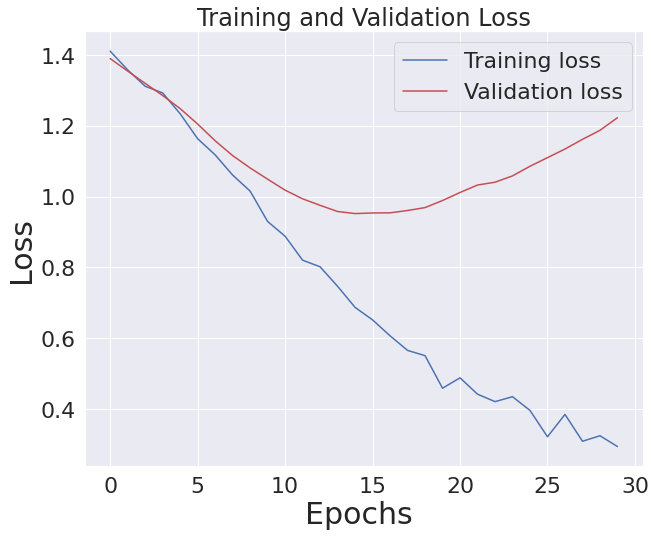

<Figure size 432x288 with 0 Axes>

In [145]:
plt.figure(figsize=(10,8))
plt.plot(range(len(training_loss[:30])), training_loss[:30], 'b', label='Training loss') #plotting training loss
plt.plot(range(len(testing_loss[:30])), testing_loss[:30], 'r', label='Validation loss') # plotting validation loss
plt.title('Training and Validation Loss')
plt.xlabel('Epochs ',fontsize=30)
plt.ylabel('Loss',fontsize=30)
plt.legend()
plt.figure()
plt.show()

We should cut off our epochs at 12.

### Cut Off Model At 12 Epochs

In [160]:
# An instance of a sequential neural; an empty model
model = tf.keras.Sequential()

In [161]:
model.add(hub_layer)
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(.7))
model.add(tf.keras.layers.Dense(32, input_dim = 4, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))

In [162]:
model.compile(optimizer= 'adam', loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [163]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 128)               124642688 
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 132       
Total params: 124,648,004
Trainable params: 124,648,004
Non-trainable params: 0
_________________________________________________________________


In [164]:
# Change from 60 to 12 epochs
history = model.fit(X_train, y_train_hot, epochs = 12, validation_split=0.35, verbose=1)

Epoch 1/12


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


7/7 [==============================] - 12s 2s/step - loss: 1.3591 - accuracy: 0.3125 - val_loss: 1.3325 - val_accuracy: 0.6250
Epoch 2/12
7/7 [==============================] - 11s 2s/step - loss: 1.2543 - accuracy: 0.5433 - val_loss: 1.2715 - val_accuracy: 0.6964
Epoch 3/12
7/7 [==============================] - 11s 2s/step - loss: 1.1282 - accuracy: 0.7115 - val_loss: 1.2041 - val_accuracy: 0.6964
Epoch 4/12
7/7 [==============================] - 11s 2s/step - loss: 1.0126 - accuracy: 0.7981 - val_loss: 1.1311 - val_accuracy: 0.7143
Epoch 5/12
7/7 [==============================] - 11s 2s/step - loss: 0.8917 - accuracy: 0.8029 - val_loss: 1.0595 - val_accuracy: 0.7054
Epoch 6/12
7/7 [==============================] - 11s 2s/step - loss: 0.7638 - accuracy: 0.8029 - val_loss: 1.0060 - val_accuracy: 0.7054
Epoch 7/12
7/7 [==============================] - 11s 2s/step - loss: 0.6647 - accuracy: 0.8173 - val_loss: 0.9731 - val_accuracy: 0.6964
Epoch 8/12
7/7 [=============================

### Validation Set

In [165]:
y_preds = model.predict(X_test)
np.round(y_preds, 2)

array([[0.04, 0.93, 0.02, 0.01],
       [0.02, 0.09, 0.86, 0.03],
       [0.01, 0.04, 0.94, 0.01],
       [0.06, 0.83, 0.07, 0.04],
       [0.08, 0.63, 0.21, 0.07],
       [0.02, 0.19, 0.77, 0.03],
       [0.04, 0.92, 0.02, 0.02],
       [0.09, 0.81, 0.06, 0.04],
       [0.13, 0.66, 0.11, 0.1 ],
       [0.03, 0.16, 0.78, 0.03],
       [0.05, 0.88, 0.05, 0.02],
       [0.12, 0.72, 0.09, 0.08],
       [0.04, 0.92, 0.02, 0.02],
       [0.01, 0.03, 0.95, 0.01],
       [0.1 , 0.46, 0.36, 0.08],
       [0.16, 0.53, 0.14, 0.16],
       [0.04, 0.89, 0.05, 0.02],
       [0.21, 0.19, 0.2 , 0.4 ],
       [0.1 , 0.2 , 0.55, 0.14],
       [0.01, 0.03, 0.96, 0.01],
       [0.15, 0.57, 0.16, 0.13],
       [0.01, 0.98, 0.  , 0.  ],
       [0.02, 0.08, 0.86, 0.03],
       [0.02, 0.06, 0.89, 0.03],
       [0.02, 0.07, 0.88, 0.03],
       [0.13, 0.66, 0.11, 0.09],
       [0.02, 0.97, 0.01, 0.  ],
       [0.06, 0.83, 0.08, 0.04],
       [0.1 , 0.19, 0.59, 0.12],
       [0.03, 0.31, 0.62, 0.03],
       [0.

In [166]:
y_pred = []
for row in y_preds:
  for node, score in enumerate(row):
    if score == max(row):
      y_pred.append(node+1)

In [167]:
from sklearn.metrics import accuracy_score

In [168]:
accuracy_score(y_test, y_pred)

0.625

### Testing on Hand-Written Texts

In [ ]:
category_descriptions = ['Something Wrong / Has Issue', 
                         'Neutral; Statement/Comment', 
                         'Possibly Looking To Buy', 
                         'Very Likely Looking To Buy']

def predict_post(post):
  prob_array = model.predict([post])[0]
  for category, probability in enumerate(prob_array):
    if probability == max(prob_array):
      print('Prediction: Category {} ({})'.format(category+1, category_descriptions[category]))
      print()
      print('Probabilities:')
      print('Category 1: {}% ({})'.format(round(prob_array[0]*100, 2), category_descriptions[0]))
      print('Category 2: {}% ({})'.format(round(prob_array[1]*100, 2), category_descriptions[1]))
      print('Category 3: {}% ({})'.format(round(prob_array[2]*100, 2), category_descriptions[2]))
      print('Category 4: {}% ({})'.format(round(prob_array[3]*100, 2), category_descriptions[3]))

In [ ]:
predict_post('Where can I buy these Hyperdunks?')

Prediction: Category 4 (Very Likely Looking To Buy)

Probabilities:
Category 1: 11.78% (Something Wrong / Has Issue)
Category 2: 15.38% (Neutral; Statement/Comment)
Category 3: 20.12% (Possibly Looking To Buy)
Category 4: 52.72% (Very Likely Looking To Buy)


# Summary